In [1]:
from glob import glob
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
def get_seeds(filenames, repeat=50):
    return pd.DataFrame({"Seed": np.array([[int(re.split( "_", filename)[1])]*repeat for filename in filenames]).flatten()})

In [3]:
smoothing_window = 1
fontsize_title = 20
fontsize_axes = 18
fontsize_legend = 14

# 2x2 Kernels on 14x14 MNIST

In [4]:
# load files

filter_size = "2x2"
path = "MNIST14x14/preencoded/" + filter_size + "/"
plot_path = "plots/" + filter_size + "/"

frqi_trainable_files = glob(path + "Seed*yes*FRQI*/train_result.csv")
frqi_untrainable_files = glob(path + "Seed*no*FRQI*/train_result.csv")
test_frqi_trainable_files = glob(path + "Seed*yes*FRQI*/test_result.csv")
test_frqi_untrainable_files = glob(path + "Seed*no*FRQI*/test_result.csv")

neqr_trainable_files = glob(path + "Seed*yes*NEQR*/train_result.csv")
neqr_untrainable_files = glob(path + "Seed*no*NEQR*/train_result.csv")
test_neqr_trainable_files = glob(path + "Seed*yes*NEQR*/test_result.csv")
test_neqr_untrainable_files = glob(path + "Seed*no*NEQR*/test_result.csv")

threshold_trainable_files = glob(path + "Seed*yes*Threshold*/train_result.csv")
threshold_untrainable_files = glob(path + "Seed*no*Threshold*/train_result.csv")
test_threshold_trainable_files = glob(path + "Seed*yes*Threshold*/test_result.csv")
test_threshold_untrainable_files = glob(path + "Seed*no*Threshold*/test_result.csv")

## Trainable FRQI vs. trainable NEQR vs trainable ThresholdEncoder

### Training Accuracy

In [5]:
frqi_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in frqi_trainable_files])
frqi_trainable["Algorithm"] = "FRQI"
frqi_trainable["QuanvolutionalLayer"] = "trainable"
frqi_trainable = frqi_trainable.reset_index().drop(columns=["index"])
frqi_trainable["Seed"] = get_seeds(frqi_trainable_files)

frqi_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in frqi_untrainable_files])
frqi_untrainable["Algorithm"] = "FRQI"
frqi_untrainable["QuanvolutionalLayer"] = "not trainable"
frqi_untrainable = frqi_untrainable.reset_index().drop(columns=["index"])
frqi_untrainable["Seed"] = get_seeds(frqi_untrainable_files)

neqr_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in neqr_trainable_files])
neqr_trainable["Algorithm"] = "NEQR"
neqr_trainable["QuanvolutionalLayer"] = "trainable"
neqr_trainable = neqr_trainable.reset_index().drop(columns=["index"])
neqr_trainable["Seed"] = get_seeds(neqr_trainable_files)

neqr_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in neqr_untrainable_files])
neqr_untrainable["Algorithm"] = "NEQR"
neqr_untrainable["QuanvolutionalLayer"] = "not trainable"
neqr_untrainable = neqr_untrainable.reset_index().drop(columns=["index"])
neqr_untrainable["Seed"] = get_seeds(neqr_untrainable_files)

threshold_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in threshold_trainable_files])
threshold_trainable["Algorithm"] = "Threshold"
threshold_trainable["QuanvolutionalLayer"] = "trainable"
threshold_trainable = threshold_trainable.reset_index().drop(columns=["index"])
threshold_trainable["Seed"] = get_seeds(threshold_trainable_files)

threshold_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in threshold_untrainable_files])
threshold_untrainable["Algorithm"] = "Threshold"
threshold_untrainable["QuanvolutionalLayer"] = "not trainable"
threshold_untrainable = threshold_untrainable.reset_index().drop(columns=["index"])
threshold_untrainable["Seed"] = get_seeds(threshold_untrainable_files)

all_trainable = pd.concat([frqi_trainable, neqr_trainable, threshold_trainable])
all_trainable = all_trainable.reset_index().drop(columns=["index"])

all_untrainable = pd.concat([frqi_untrainable, neqr_untrainable, threshold_untrainable])
all_untrainable = all_untrainable.reset_index().drop(columns=["index"])

all_data = pd.concat([all_trainable, all_untrainable])
all_data = all_data.reset_index().drop(columns=["index"])

In [6]:
test_frqi_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_frqi_trainable_files])
test_frqi_trainable["Algorithm"] = "FRQI"
test_frqi_trainable["QuanvolutionalLayer"] = "trainable"
test_frqi_trainable = test_frqi_trainable.reset_index().drop(columns=["index"])
test_frqi_trainable["Seed"] = get_seeds(test_frqi_trainable_files, repeat=1)

test_frqi_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_frqi_untrainable_files])
test_frqi_untrainable["Algorithm"] = "FRQI"
test_frqi_untrainable["QuanvolutionalLayer"] = "not trainable"
test_frqi_untrainable = test_frqi_untrainable.reset_index().drop(columns=["index"])
test_frqi_untrainable["Seed"] = get_seeds(test_frqi_untrainable_files, repeat=1)

test_neqr_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_neqr_trainable_files])
test_neqr_trainable["Algorithm"] = "NEQR"
test_neqr_trainable["QuanvolutionalLayer"] = "trainable"
test_neqr_trainable = test_neqr_trainable.reset_index().drop(columns=["index"])
test_neqr_trainable["Seed"] = get_seeds(test_neqr_trainable_files, repeat=1)

test_neqr_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_neqr_untrainable_files])
test_neqr_untrainable["Algorithm"] = "NEQR"
test_neqr_untrainable["QuanvolutionalLayer"] = "not trainable"
test_neqr_untrainable = test_neqr_untrainable.reset_index().drop(columns=["index"])
test_neqr_untrainable["Seed"] = get_seeds(test_neqr_untrainable_files, repeat=1)

test_threshold_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_threshold_trainable_files])
test_threshold_trainable["Algorithm"] = "Threshold"
test_threshold_trainable["QuanvolutionalLayer"] = "trainable"
test_threshold_trainable = test_threshold_trainable.reset_index().drop(columns=["index"])
test_threshold_trainable["Seed"] = get_seeds(test_threshold_trainable_files, repeat=1)

test_threshold_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_threshold_untrainable_files])
test_threshold_untrainable["Algorithm"] = "Threshold"
test_threshold_untrainable["QuanvolutionalLayer"] = "not trainable"
test_threshold_untrainable = test_threshold_untrainable.reset_index().drop(columns=["index"])
test_threshold_untrainable["Seed"] = get_seeds(test_threshold_untrainable_files, repeat=1)

test_all_trainable = pd.concat([test_frqi_trainable, test_neqr_trainable, test_threshold_trainable])
test_all_trainable = test_all_trainable.reset_index().drop(columns=["index"])

test_all_untrainable = pd.concat([test_frqi_untrainable, test_neqr_untrainable, test_threshold_untrainable])
test_all_untrainable = test_all_untrainable.reset_index().drop(columns=["index"])

test_all_data = pd.concat([test_all_trainable, test_all_untrainable])
test_all_data = test_all_data.reset_index().drop(columns=["index"])

In [7]:
# Mean train and validation accuracies over the last 20 epochs
all_data[all_data.epoch > all_data.epoch.max()-20].groupby(["Algorithm","QuanvolutionalLayer"])[["train_acc", "val_acc"]].agg(["mean", "max", "var"])

train_acc                   val_acc        \
                                   mean    max       var     mean   max   
Algorithm QuanvolutionalLayer                                             
FRQI      not trainable        0.792850  0.940  0.014625  0.78875  0.95   
          trainable            0.861550  0.935  0.001352  0.85275  0.93   
NEQR      not trainable        0.784675  0.875  0.001247  0.77255  0.93   
          trainable            0.786200  0.860  0.001176  0.76945  0.89   
Threshold not trainable        0.817600  0.910  0.001430  0.79600  0.90   
          trainable            0.827175  0.925  0.001519  0.79570  0.92   

                                         
                                    var  
Algorithm QuanvolutionalLayer            
FRQI      not trainable        0.014604  
          trainable            0.001807  
NEQR      not trainable        0.003749  
          trainable            0.003157  
Threshold not trainable        0.002493  
          trainable            0.002443

In [8]:
test_all_data.groupby(["Algorithm","QuanvolutionalLayer"])[["test_acc", ]].agg(["mean", "max", "var"])

test_acc                 
                                  mean    max       var
Algorithm QuanvolutionalLayer                          
FRQI      not trainable         0.8060  0.878  0.009594
          trainable             0.8539  0.884  0.000812
NEQR      not trainable         0.7600  0.830  0.002392
          trainable             0.7744  0.839  0.003418
Threshold not trainable         0.7921  0.882  0.003757
          trainable             0.8250  0.881  0.001113

In [9]:
# training time per step
all_data.groupby(["Algorithm","QuanvolutionalLayer"])[["train_time_per_step", ]].agg(["mean"])*100*50/60/60


train_time_per_step
                                             mean
Algorithm QuanvolutionalLayer                    
FRQI      not trainable                  1.342725
          trainable                     24.132145
NEQR      not trainable                  3.505045
          trainable                     38.600331
Threshold not trainable                  1.895061
          trainable                     22.017976

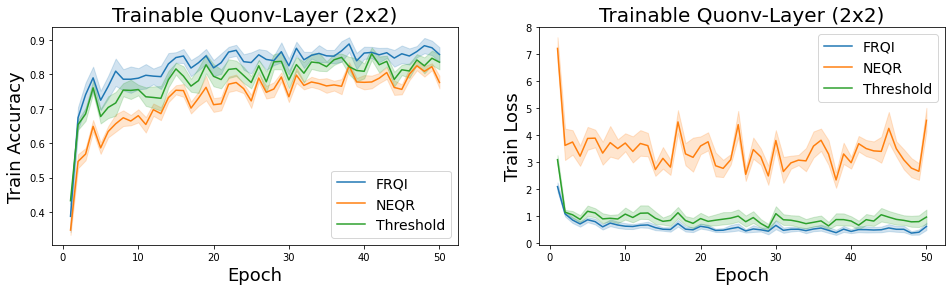

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = all_trainable
data = all_trainable.groupby(["Algorithm", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="train_acc", hue="Algorithm", ax=ax1)

ax1.set_title("Trainable Quonv-Layer (2x2)", fontsize=fontsize_title)
ax1.set_ylabel("Train Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="train_loss", hue="Algorithm", ax=ax2)

ax2.set_title("Trainable Quonv-Layer (2x2)", fontsize=fontsize_title)
ax2.set_ylabel("Train Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "all_algorithms_2x2_trainable_train_acc.png")

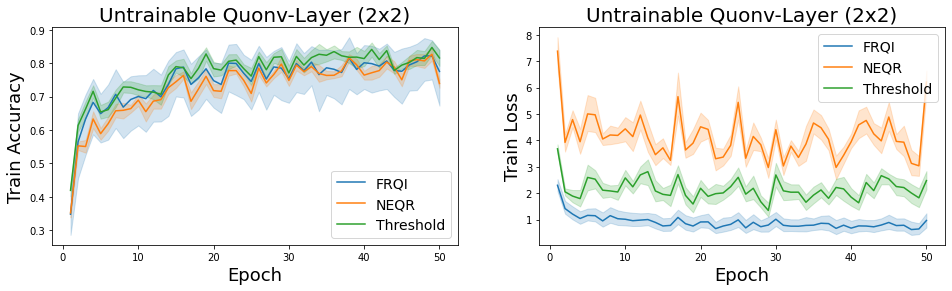

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = all_untrainable
data = all_untrainable.groupby(["Algorithm", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="train_acc", hue="Algorithm", ax=ax1)

ax1.set_title("Untrainable Quonv-Layer (2x2)", fontsize=fontsize_title)
ax1.set_ylabel("Train Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="train_loss", hue="Algorithm", ax=ax2)

ax2.set_title("Untrainable Quonv-Layer (2x2)", fontsize=fontsize_title)
ax2.set_ylabel("Train Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "all_algorithms_2x2_untrainable_train_acc.png")

### Validation Accuracy

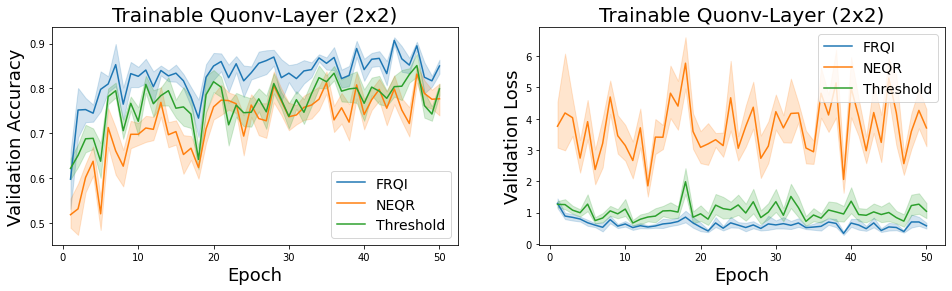

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = all_trainable
data = all_trainable.groupby(["Algorithm", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="Algorithm", ax=ax1)

ax1.set_title("Trainable Quonv-Layer (2x2)", fontsize=fontsize_title)
ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="Algorithm", ax=ax2)

ax2.set_title("Trainable Quonv-Layer (2x2)", fontsize=fontsize_title)
ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)

fig.savefig(plot_path + "all_algorithms_2x2_trainable_val_acc.png")

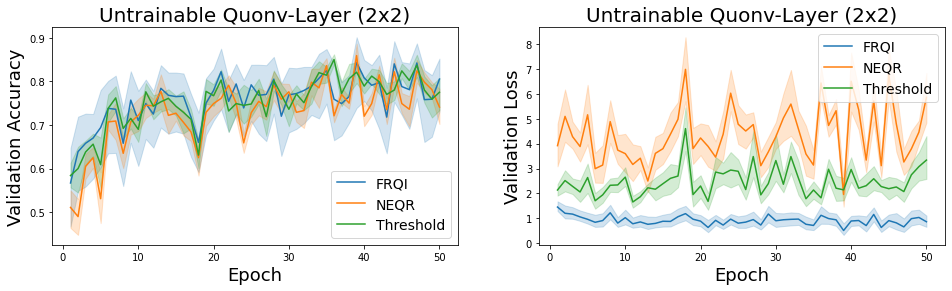

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = all_untrainable
data = all_untrainable.groupby(["Algorithm", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="Algorithm", ax=ax1)

ax1.set_title("Untrainable Quonv-Layer (2x2)", fontsize=fontsize_title)
ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="Algorithm", ax=ax2)

ax2.set_title("Untrainable Quonv-Layer (2x2)", fontsize=fontsize_title)
ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "all_algorithms_2x2_untrainable_val_acc.png")

## Trainable vs not trainable

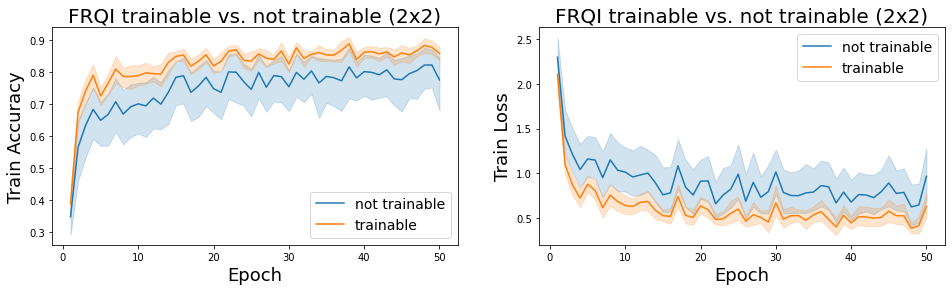

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([frqi_trainable, frqi_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="train_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("FRQI trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax1.set_ylabel("Train Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="train_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("FRQI trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax2.set_ylabel("Train Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "FRQI_trainable_vs_untrainable_train_acc.png")

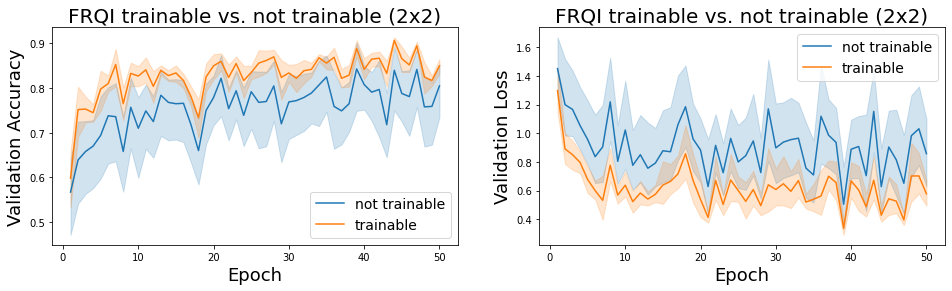

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([frqi_trainable, frqi_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()


ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("FRQI trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("FRQI trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "FRQI_trainable_vs_untrainable_val_acc.png")

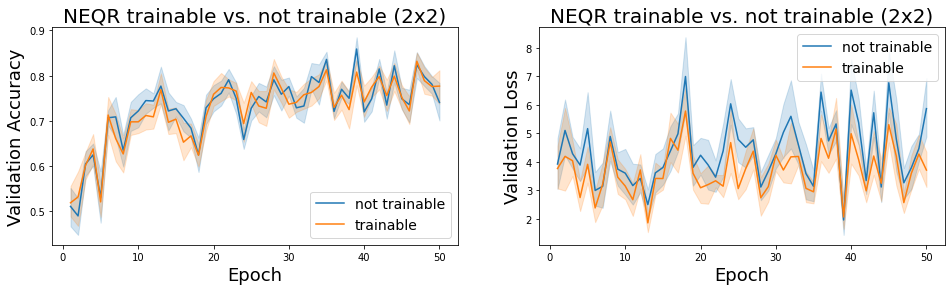

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([neqr_trainable, neqr_untrainable])
data = pd.concat([neqr_trainable, neqr_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("NEQR trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("NEQR trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "NEQR_trainable_vs_untrainable_train_acc.png")

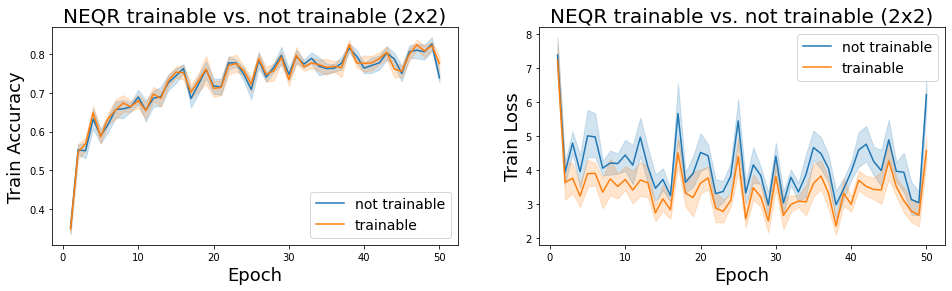

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([neqr_trainable, neqr_untrainable])
data = pd.concat([neqr_trainable, neqr_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="train_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("NEQR trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax1.set_ylabel("Train Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="train_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("NEQR trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax2.set_ylabel("Train Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "NEQR_trainable_vs_untrainable_val_acc.png")

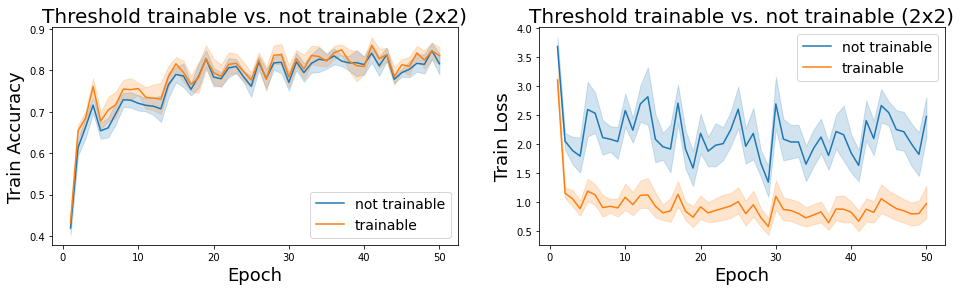

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([threshold_trainable, threshold_untrainable])
data = pd.concat([threshold_trainable, threshold_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="train_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("Threshold trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax1.set_ylabel("Train Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="train_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("Threshold trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax2.set_ylabel("Train Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "ThresholdEncoder_trainable_vs_untrainable_train_acc.png")

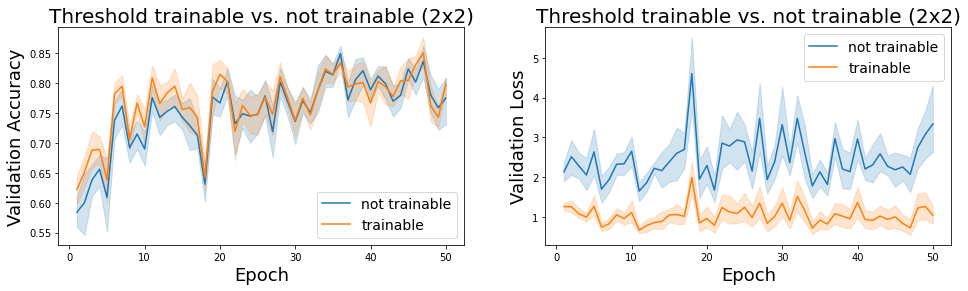

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([threshold_trainable, threshold_untrainable])
data = pd.concat([threshold_trainable, threshold_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("Threshold trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("Threshold trainable vs. not trainable (2x2)", fontsize=fontsize_title)
ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "ThresholdEncoder_trainable_vs_untrainable_val_acc.png")

## Performace of individual Architectures 

### FRQI

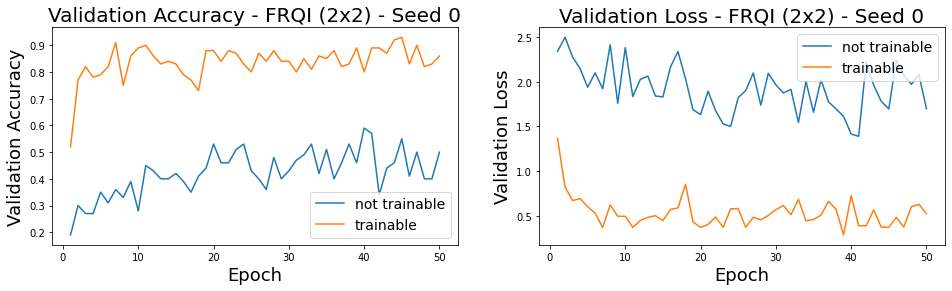

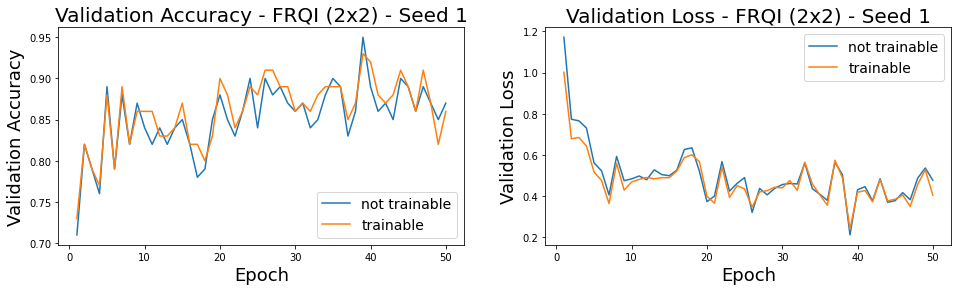

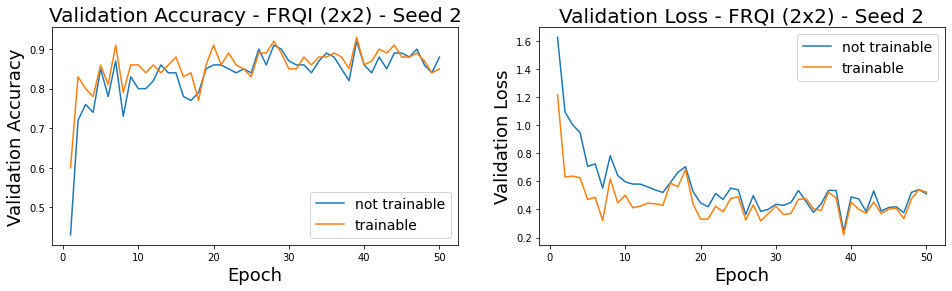

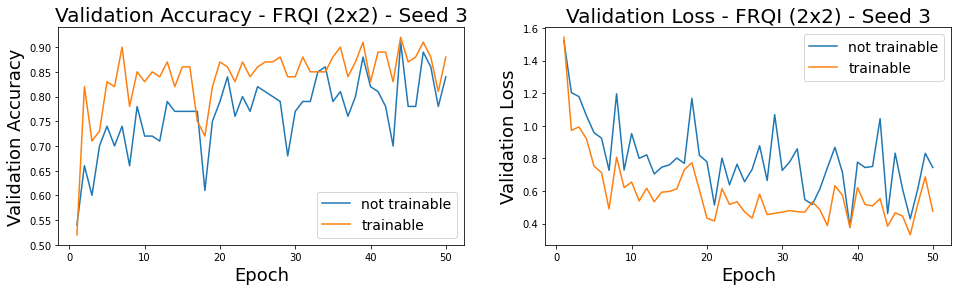

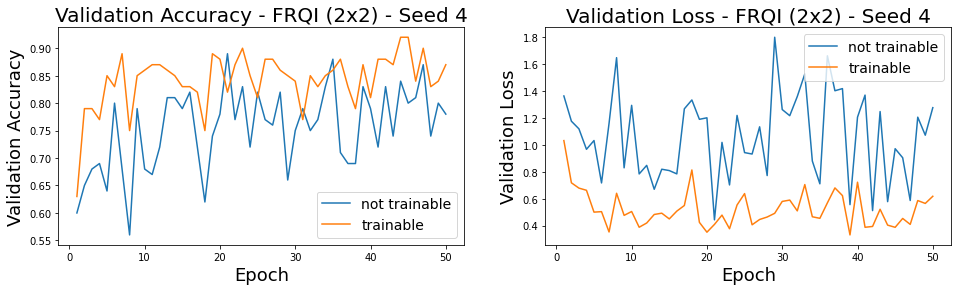

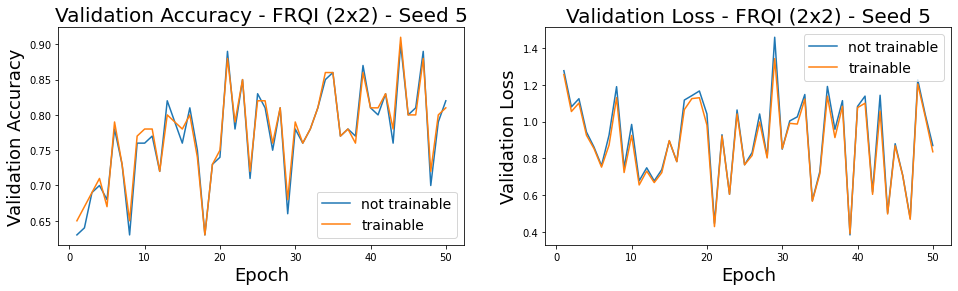

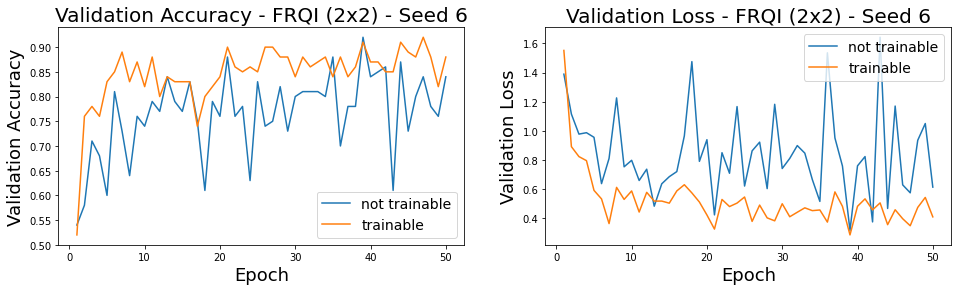

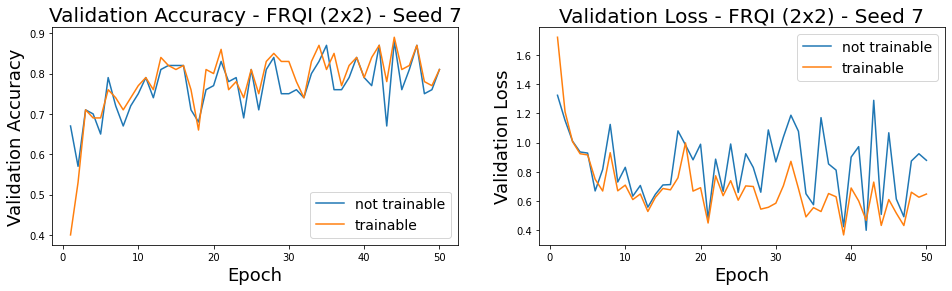

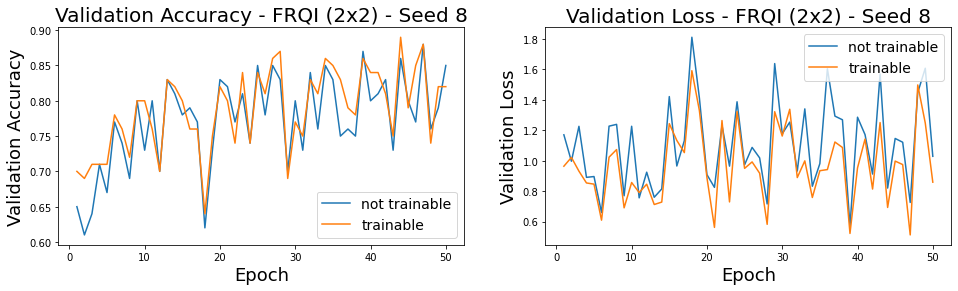

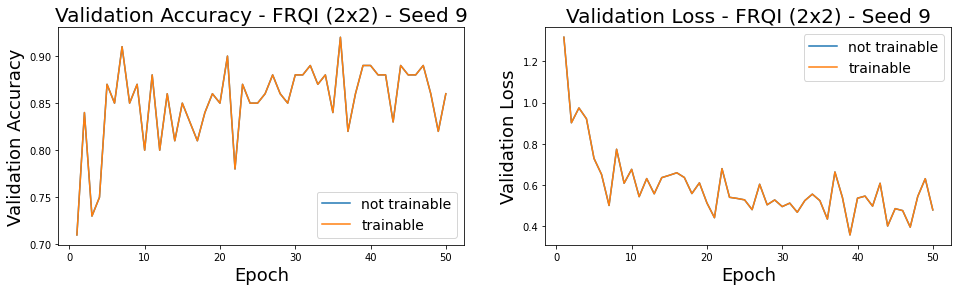

In [20]:
xticklabels = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for seed in sorted(all_data.Seed.unique()):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
    
    data = pd.concat([frqi_trainable, frqi_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()
    data = data[data.Seed == seed]
    title = "FRQI ({}) - Seed {}".format(filter_size, seed)

    
    ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

    ax1.set_title("Validation Accuracy - " + title, fontsize=fontsize_title)
    ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
    ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax1.legend(loc="lower right", fontsize=fontsize_legend)


    ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

    ax2.set_title("Validation Loss - " + title, fontsize=fontsize_title)
    ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
    ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax2.legend(loc="upper right", fontsize=fontsize_legend)
    
    
    fig.savefig(plot_path + "FRQI_Seed_{}_trainable_vs_untrainable_val_acc.png".format(seed))
    

### NEQR

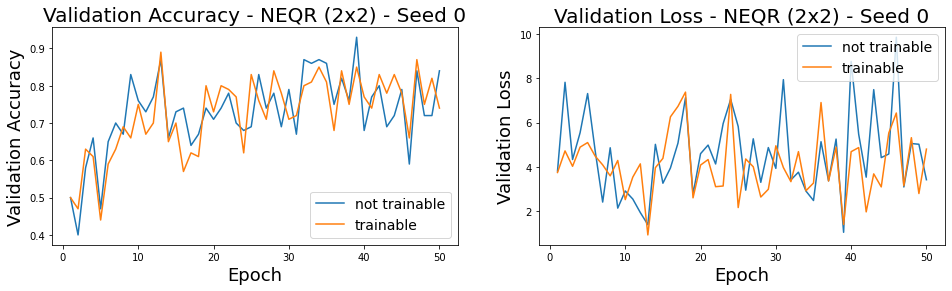

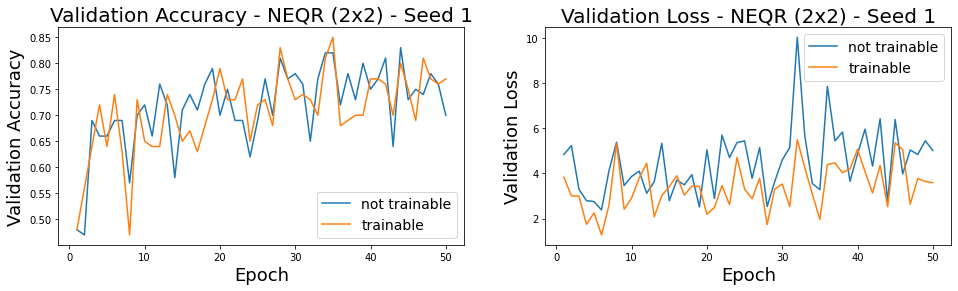

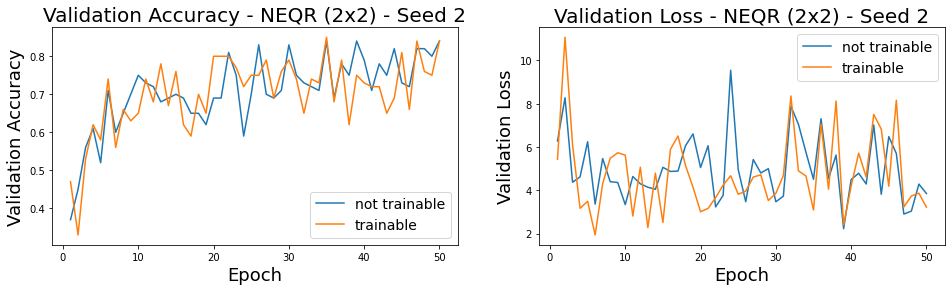

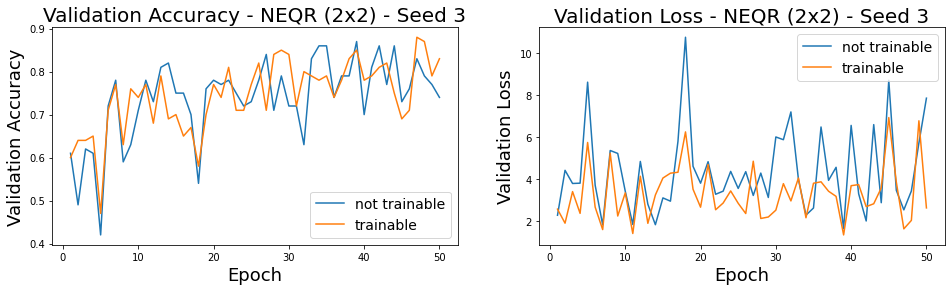

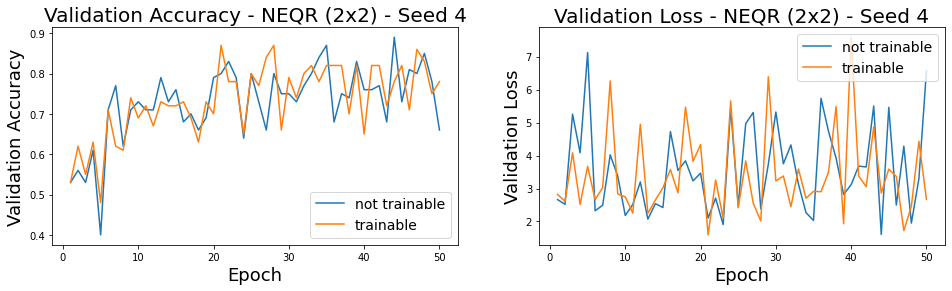

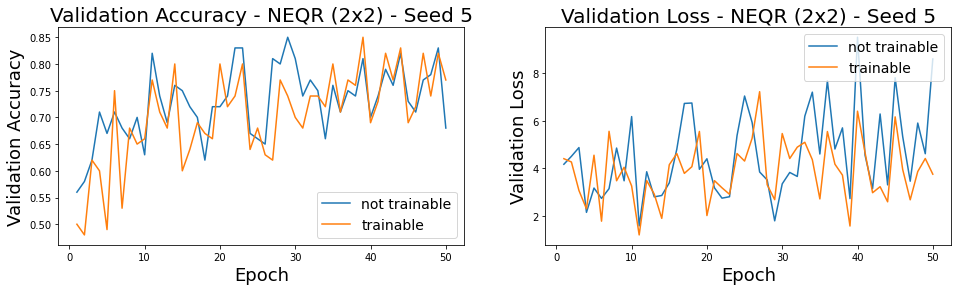

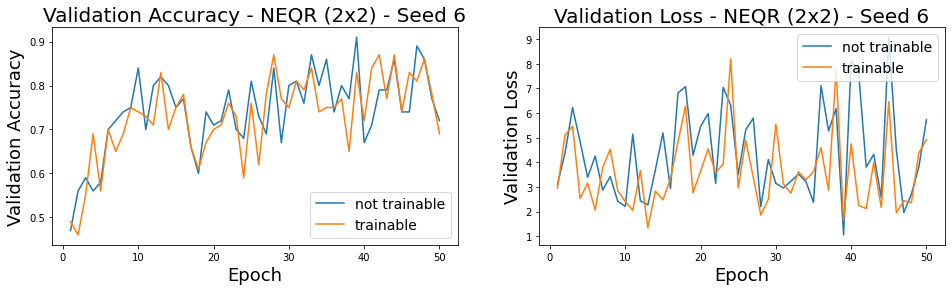

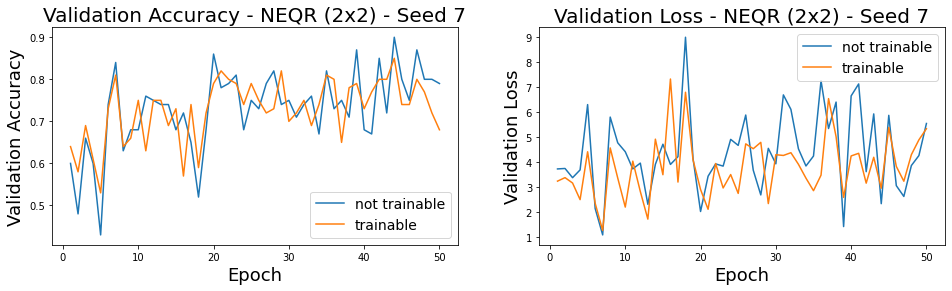

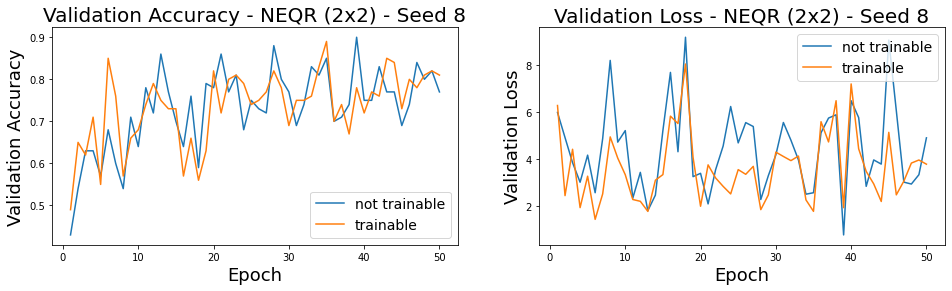

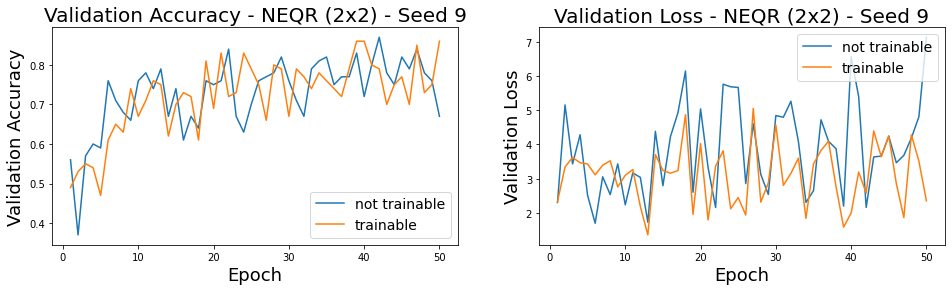

In [21]:
for seed in sorted(all_data.Seed.unique()):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
    
    data = pd.concat([neqr_trainable, neqr_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()
    data = data[data.Seed == seed]
    title = "NEQR ({}) - Seed {}".format(filter_size, seed)

    
    ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

    ax1.set_title("Validation Accuracy - " + title, fontsize=fontsize_title)
    ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
    ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax1.legend(loc="lower right", fontsize=fontsize_legend)


    ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

    ax2.set_title("Validation Loss - " + title, fontsize=fontsize_title)
    ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
    ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax2.legend(loc="upper right", fontsize=fontsize_legend)
    
    
    fig.savefig(plot_path + "NEQR_Seed_{}_trainable_vs_untrainable_val_acc.png".format(seed))
    

### Threshold Encoder

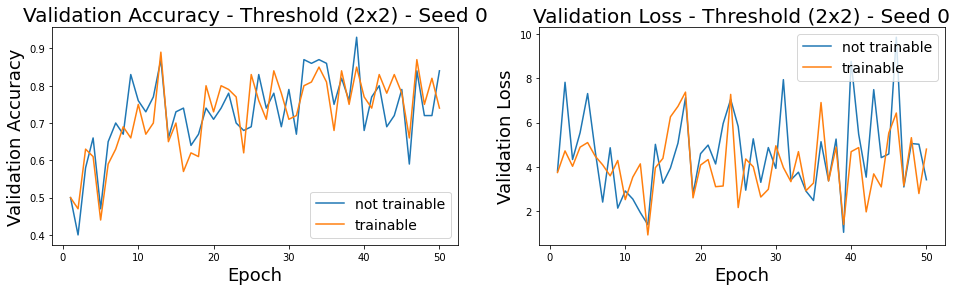

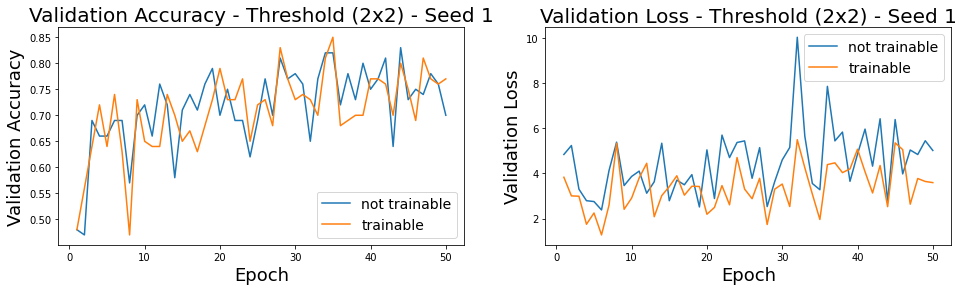

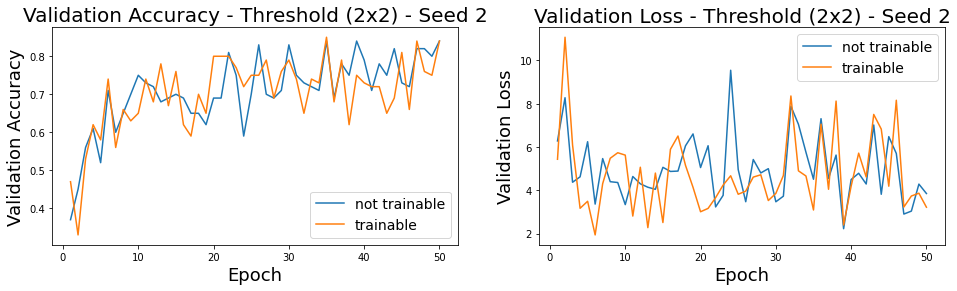

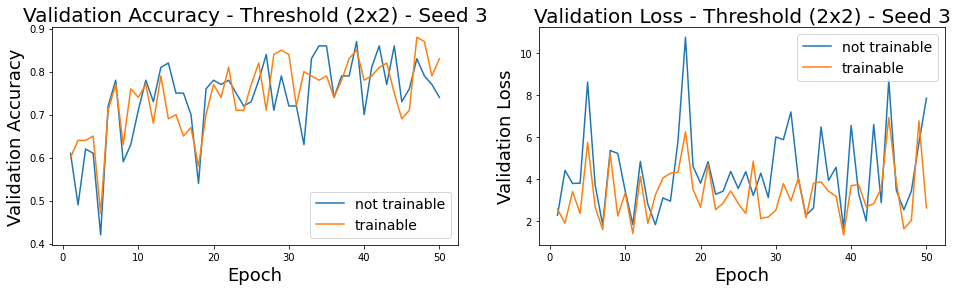

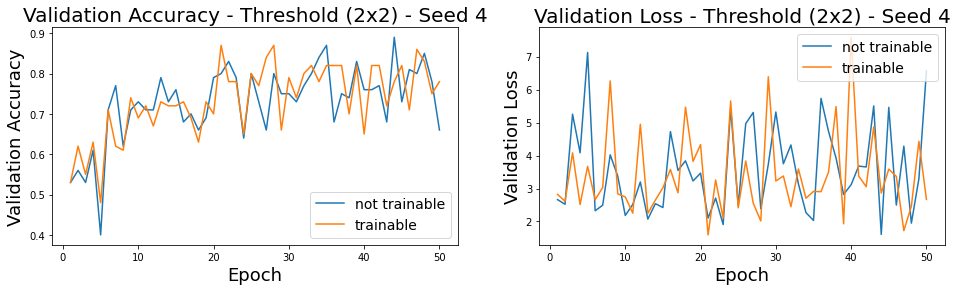

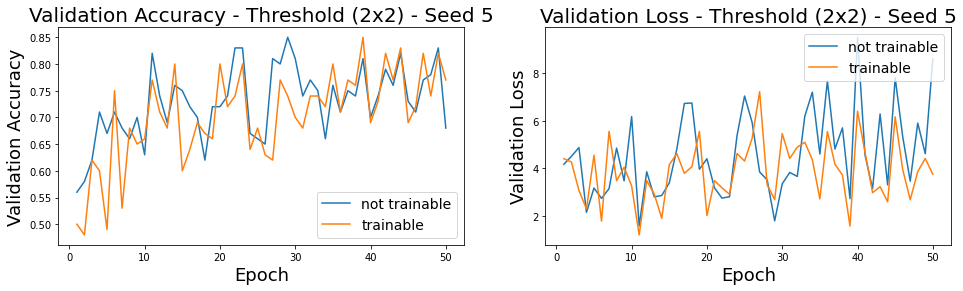

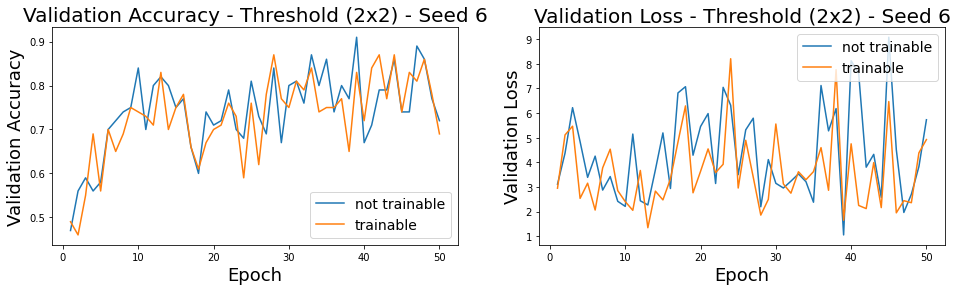

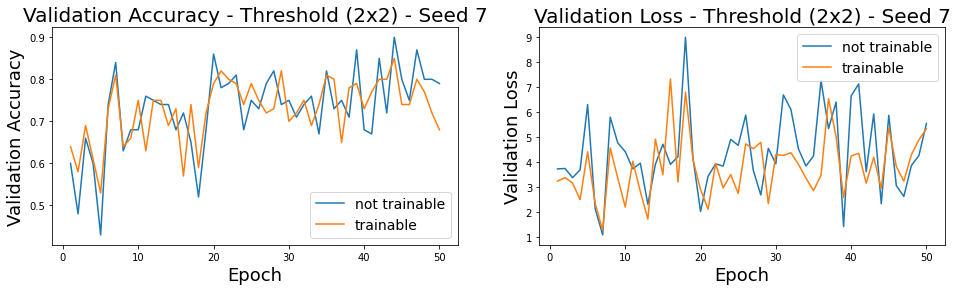

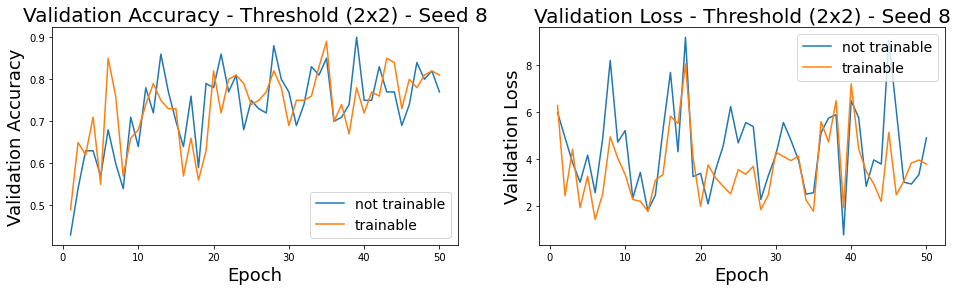

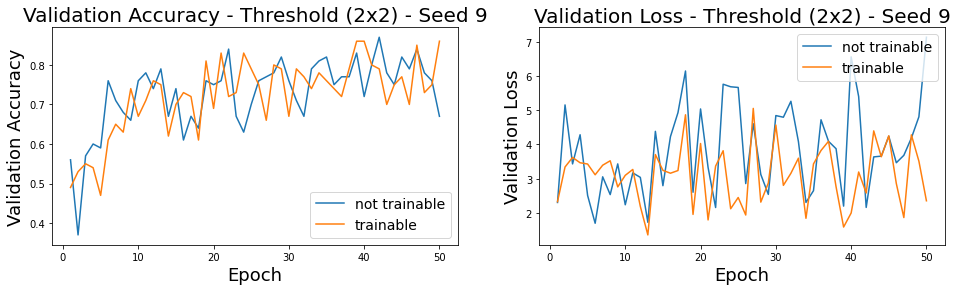

In [22]:
for seed in sorted(all_data.Seed.unique()):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
    
    data = pd.concat([neqr_trainable, neqr_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()
    data = data[data.Seed == seed]
    title = "Threshold ({}) - Seed {}".format(filter_size, seed)

    
    ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

    ax1.set_title("Validation Accuracy - " + title, fontsize=fontsize_title)
    ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
    ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax1.legend(loc="lower right", fontsize=fontsize_legend)


    ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

    ax2.set_title("Validation Loss - " + title, fontsize=fontsize_title)
    ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
    ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax2.legend(loc="upper right", fontsize=fontsize_legend)
    
    
    fig.savefig(plot_path + "ThresholdEncoder_Seed_{}_trainable_vs_untrainable_val_acc.png".format(seed))
    

# 4x4 Kernels on 14x14 MNIST

In [23]:
# load files

filter_size = "4x4"
path = "MNIST14x14/preencoded/" + filter_size + "/"
plot_path = "plots/" + filter_size + "/"

frqi_trainable_files = glob(path + "Seed*yes*FRQI*/train_result.csv")
frqi_untrainable_files = glob(path + "Seed*no*FRQI*/train_result.csv")
test_frqi_trainable_files = glob(path + "Seed*yes*FRQI*/test_result.csv")
test_frqi_untrainable_files = glob(path + "Seed*no*FRQI*/test_result.csv")

neqr_trainable_files = glob(path + "Seed*yes*NEQR*/train_result.csv")
neqr_untrainable_files = glob(path + "Seed*no*NEQR*/train_result.csv")
test_neqr_trainable_files = glob(path + "Seed*yes*NEQR*/test_result.csv")
test_neqr_untrainable_files = glob(path + "Seed*no*NEQR*/test_result.csv")

threshold_trainable_files = glob(path + "Seed*yes*Threshold*/train_result.csv")
threshold_untrainable_files = glob(path + "Seed*no*Threshold*/train_result.csv")
test_threshold_trainable_files = glob(path + "Seed*yes*Threshold*/test_result.csv")
test_threshold_untrainable_files = glob(path + "Seed*no*Threshold*/test_result.csv")

## Trainable FRQI vs. trainable NEQR vs trainable ThresholdEncoder

### Training Accuracy

In [24]:
frqi_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in frqi_trainable_files])
frqi_trainable["Algorithm"] = "FRQI"
frqi_trainable["QuanvolutionalLayer"] = "trainable"
frqi_trainable = frqi_trainable.reset_index().drop(columns=["index"])
frqi_trainable["Seed"] = get_seeds(frqi_trainable_files)

frqi_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in frqi_untrainable_files])
frqi_untrainable["Algorithm"] = "FRQI"
frqi_untrainable["QuanvolutionalLayer"] = "not trainable"
frqi_untrainable = frqi_untrainable.reset_index().drop(columns=["index"])
frqi_untrainable["Seed"] = get_seeds(frqi_untrainable_files)

neqr_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in neqr_trainable_files])
neqr_trainable["Algorithm"] = "NEQR"
neqr_trainable["QuanvolutionalLayer"] = "trainable"
neqr_trainable = neqr_trainable.reset_index().drop(columns=["index"])
neqr_trainable["Seed"] = get_seeds(neqr_trainable_files)

neqr_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in neqr_untrainable_files])
neqr_untrainable["Algorithm"] = "NEQR"
neqr_untrainable["QuanvolutionalLayer"] = "not trainable"
neqr_untrainable = neqr_untrainable.reset_index().drop(columns=["index"])
neqr_untrainable["Seed"] = get_seeds(neqr_untrainable_files)

threshold_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in threshold_trainable_files])
threshold_trainable["Algorithm"] = "Threshold"
threshold_trainable["QuanvolutionalLayer"] = "trainable"
threshold_trainable = threshold_trainable.reset_index().drop(columns=["index"])
threshold_trainable["Seed"] = get_seeds(threshold_trainable_files)

threshold_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in threshold_untrainable_files])
threshold_untrainable["Algorithm"] = "Threshold"
threshold_untrainable["QuanvolutionalLayer"] = "not trainable"
threshold_untrainable = threshold_untrainable.reset_index().drop(columns=["index"])
threshold_untrainable["Seed"] = get_seeds(threshold_untrainable_files)

all_trainable = pd.concat([frqi_trainable, neqr_trainable, threshold_trainable])
all_trainable = all_trainable.reset_index().drop(columns=["index"])

all_untrainable = pd.concat([frqi_untrainable, neqr_untrainable, threshold_untrainable])
all_untrainable = all_untrainable.reset_index().drop(columns=["index"])

all_data = pd.concat([all_trainable, all_untrainable])
all_data = all_data.reset_index().drop(columns=["index"])

In [25]:
test_frqi_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_frqi_trainable_files])
test_frqi_trainable["Algorithm"] = "FRQI"
test_frqi_trainable["QuanvolutionalLayer"] = "trainable"
test_frqi_trainable = test_frqi_trainable.reset_index().drop(columns=["index"])
test_frqi_trainable["Seed"] = get_seeds(test_frqi_trainable_files, repeat=1)

test_frqi_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_frqi_untrainable_files])
test_frqi_untrainable["Algorithm"] = "FRQI"
test_frqi_untrainable["QuanvolutionalLayer"] = "not trainable"
test_frqi_untrainable = test_frqi_untrainable.reset_index().drop(columns=["index"])
test_frqi_untrainable["Seed"] = get_seeds(test_frqi_untrainable_files, repeat=1)

test_neqr_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_neqr_trainable_files])
test_neqr_trainable["Algorithm"] = "NEQR"
test_neqr_trainable["QuanvolutionalLayer"] = "trainable"
test_neqr_trainable = test_neqr_trainable.reset_index().drop(columns=["index"])
test_neqr_trainable["Seed"] = get_seeds(test_neqr_trainable_files, repeat=1)

test_neqr_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_neqr_untrainable_files])
test_neqr_untrainable["Algorithm"] = "NEQR"
test_neqr_untrainable["QuanvolutionalLayer"] = "not trainable"
test_neqr_untrainable = test_neqr_untrainable.reset_index().drop(columns=["index"])
test_neqr_untrainable["Seed"] = get_seeds(test_neqr_untrainable_files, repeat=1)

test_threshold_trainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_threshold_trainable_files])
test_threshold_trainable["Algorithm"] = "Threshold"
test_threshold_trainable["QuanvolutionalLayer"] = "trainable"
test_threshold_trainable = test_threshold_trainable.reset_index().drop(columns=["index"])
test_threshold_trainable["Seed"] = get_seeds(test_threshold_trainable_files, repeat=1)

test_threshold_untrainable = pd.concat([pd.read_csv(filepath_or_buffer=f) for f in test_threshold_untrainable_files])
test_threshold_untrainable["Algorithm"] = "Threshold"
test_threshold_untrainable["QuanvolutionalLayer"] = "not trainable"
test_threshold_untrainable = test_threshold_untrainable.reset_index().drop(columns=["index"])
test_threshold_untrainable["Seed"] = get_seeds(test_threshold_untrainable_files, repeat=1)

test_all_trainable = pd.concat([test_frqi_trainable, test_neqr_trainable, test_threshold_trainable])
test_all_trainable = test_all_trainable.reset_index().drop(columns=["index"])

test_all_untrainable = pd.concat([test_frqi_untrainable, test_neqr_untrainable, test_threshold_untrainable])
test_all_untrainable = test_all_untrainable.reset_index().drop(columns=["index"])

test_all_data = pd.concat([test_all_trainable, test_all_untrainable])
test_all_data = test_all_data.reset_index().drop(columns=["index"])

In [26]:
# Mean train and validation accuracies over the last 20 epochs
all_data[all_data.epoch > all_data.epoch.max()-20].groupby(["Algorithm","QuanvolutionalLayer"])[["train_acc", "val_acc"]].agg(["mean", "max"])

train_acc         val_acc      
                                   mean    max     mean   max
Algorithm QuanvolutionalLayer                                
FRQI      not trainable        0.638550  0.870  0.62250  0.84
          trainable            0.737325  0.865  0.73200  0.87
NEQR      not trainable        0.754875  0.870  0.75570  0.92
          trainable            0.782675  0.880  0.78020  0.92
Threshold not trainable        0.818175  0.890  0.79560  0.91
          trainable            0.811725  0.880  0.79275  0.89

In [27]:
test_all_data.groupby(["Algorithm","QuanvolutionalLayer"])[["test_acc", ]].agg(["mean", "max"])

test_acc       
                                  mean    max
Algorithm QuanvolutionalLayer                
FRQI      not trainable         0.6018  0.826
          trainable             0.7153  0.836
NEQR      not trainable         0.7266  0.789
          trainable             0.7588  0.846
Threshold not trainable         0.8275  0.859
          trainable             0.8024  0.845

In [28]:
# training time per step
all_data.groupby(["Algorithm","QuanvolutionalLayer"])[["train_time_per_step", ]].agg(["mean"])*100*50/60/60


train_time_per_step
                                             mean
Algorithm QuanvolutionalLayer                    
FRQI      not trainable                  0.528713
          trainable                      7.311997
NEQR      not trainable                  1.549068
          trainable                     12.330017
Threshold not trainable                 24.518437
          trainable                     78.317801

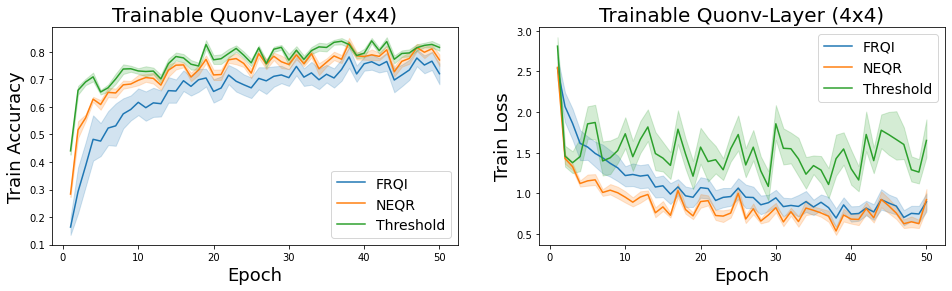

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = all_trainable
data = all_trainable.groupby(["Algorithm", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="train_acc", hue="Algorithm", ax=ax1)

ax1.set_title("Trainable Quonv-Layer (4x4)", fontsize=fontsize_title)
ax1.set_ylabel("Train Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="train_loss", hue="Algorithm", ax=ax2)

ax2.set_title("Trainable Quonv-Layer (4x4)", fontsize=fontsize_title)
ax2.set_ylabel("Train Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)

fig.savefig(plot_path + "all_algorithms_"+filter_size+"_trainable_train_acc.png")

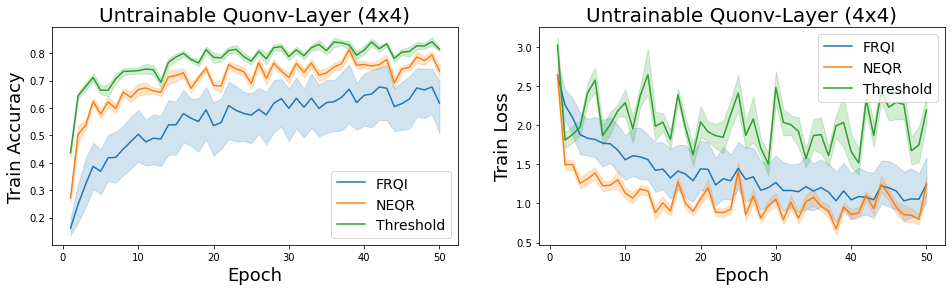

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = all_untrainable
data = all_untrainable.groupby(["Algorithm", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="train_acc", hue="Algorithm", ax=ax1)

ax1.set_title("Untrainable Quonv-Layer (4x4)", fontsize=fontsize_title)
ax1.set_ylabel("Train Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="train_loss", hue="Algorithm", ax=ax2)

ax2.set_title("Untrainable Quonv-Layer (4x4)", fontsize=fontsize_title)
ax2.set_ylabel("Train Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "all_algorithms_"+filter_size+"_untrainable_train_acc.png")

### Validation Accuracy

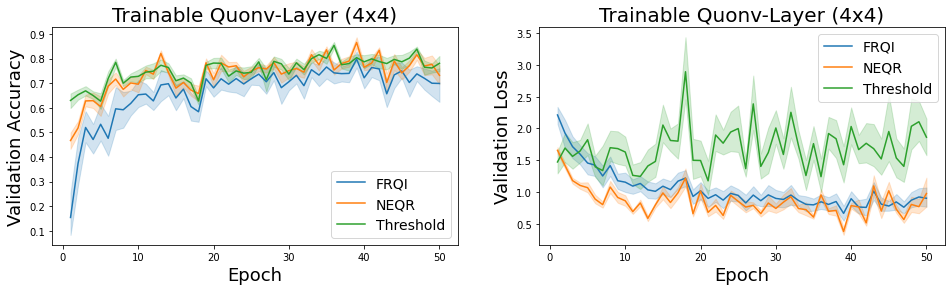

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = all_trainable
data = all_trainable.groupby(["Algorithm", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="Algorithm", ax=ax1)

ax1.set_title("Trainable Quonv-Layer (4x4)", fontsize=fontsize_title)
ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="Algorithm", ax=ax2)

ax2.set_title("Trainable Quonv-Layer (4x4)", fontsize=fontsize_title)
ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)

fig.savefig(plot_path + "all_algorithms_"+filter_size+"_trainable_val_acc.png")

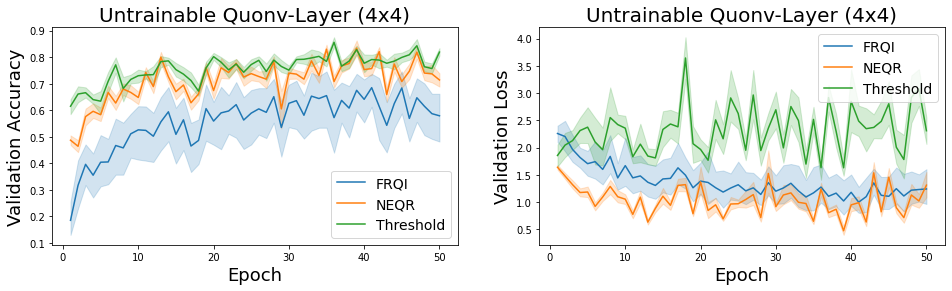

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = all_untrainable
data = all_untrainable.groupby(["Algorithm", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="Algorithm", ax=ax1)

ax1.set_title("Untrainable Quonv-Layer (4x4)", fontsize=fontsize_title)
ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="Algorithm", ax=ax2)

ax2.set_title("Untrainable Quonv-Layer (4x4)", fontsize=fontsize_title)
ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "all_algorithms_"+filter_size+"_untrainable_val_acc.png")

## Trainable vs not trainable

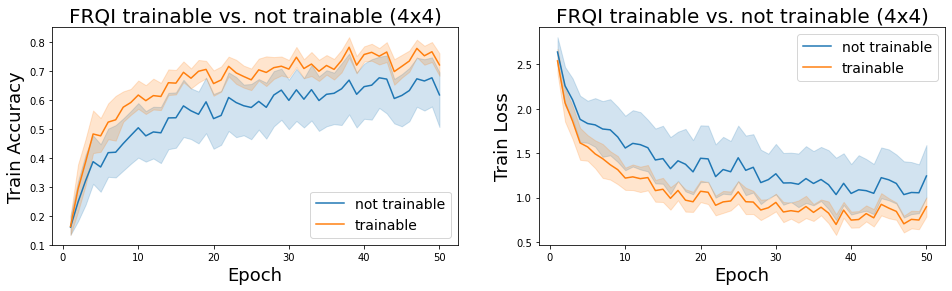

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([frqi_trainable, frqi_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="train_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("FRQI trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax1.set_ylabel("Train Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="train_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("FRQI trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax2.set_ylabel("Train Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "FRQI_trainable_vs_untrainable_train_acc.png")

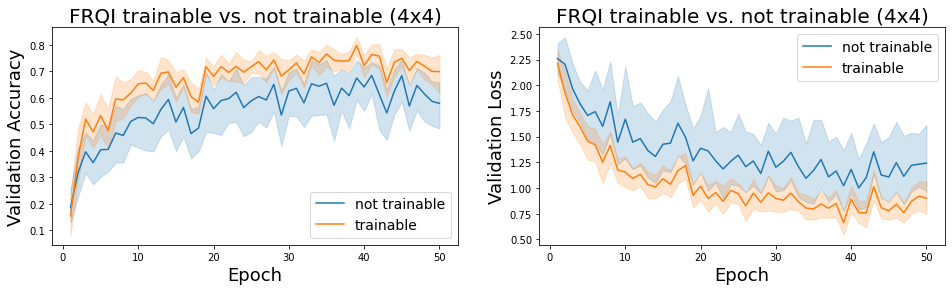

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([frqi_trainable, frqi_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()


ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("FRQI trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("FRQI trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "FRQI_trainable_vs_untrainable_val_acc.png")

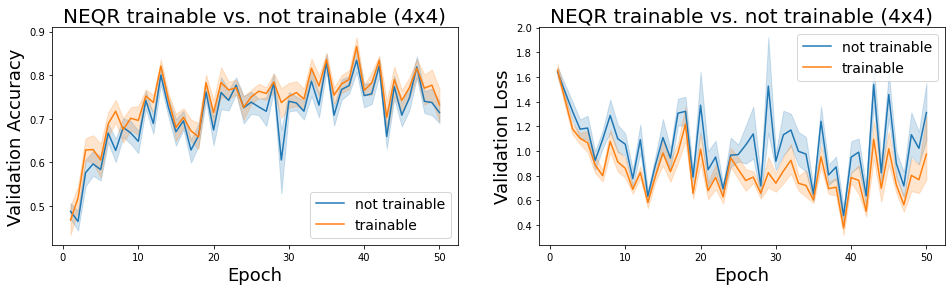

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([neqr_trainable, neqr_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("NEQR trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("NEQR trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "NEQR_trainable_vs_untrainable_train_acc.png")

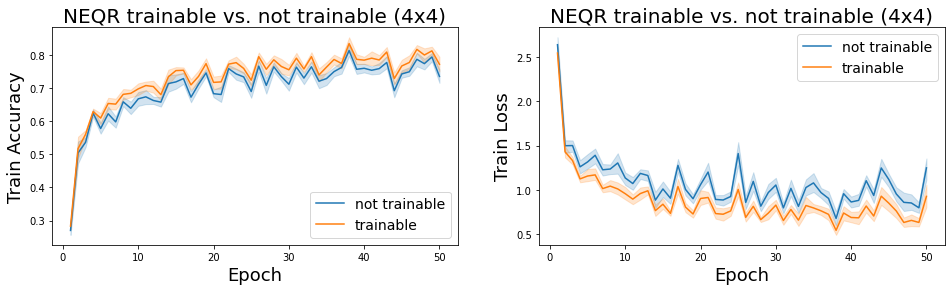

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([neqr_trainable, neqr_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="train_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("NEQR trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax1.set_ylabel("Train Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="train_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("NEQR trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax2.set_ylabel("Train Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "NEQR_trainable_vs_untrainable_val_acc.png")

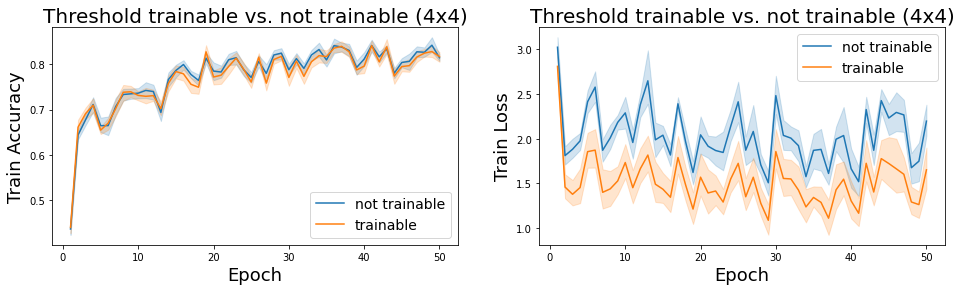

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([threshold_trainable, threshold_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="train_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("Threshold trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax1.set_ylabel("Train Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="train_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("Threshold trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax2.set_ylabel("Train Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "ThresholdEncoder_trainable_vs_untrainable_train_acc.png")

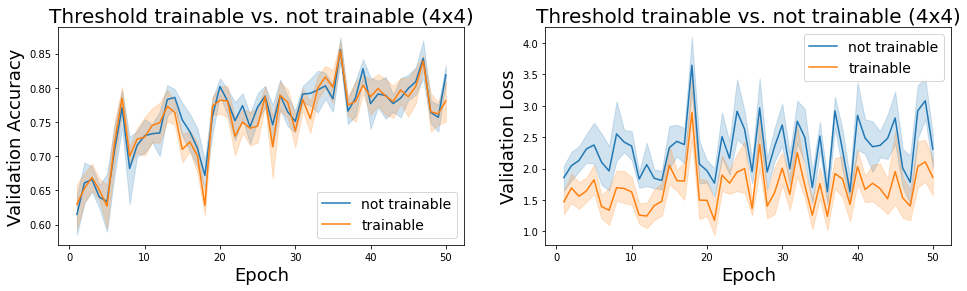

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = pd.concat([threshold_trainable, threshold_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()

ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

ax1.set_title("Threshold trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
ax1.legend(loc="lower right", fontsize=fontsize_legend)


ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

ax2.set_title("Threshold trainable vs. not trainable (4x4)", fontsize=fontsize_title)
ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
ax2.legend(loc="upper right", fontsize=fontsize_legend)


fig.savefig(plot_path + "ThresholdEncoder_trainable_vs_untrainable_val_acc.png")

## Performace of individual Architectures 

### FRQI

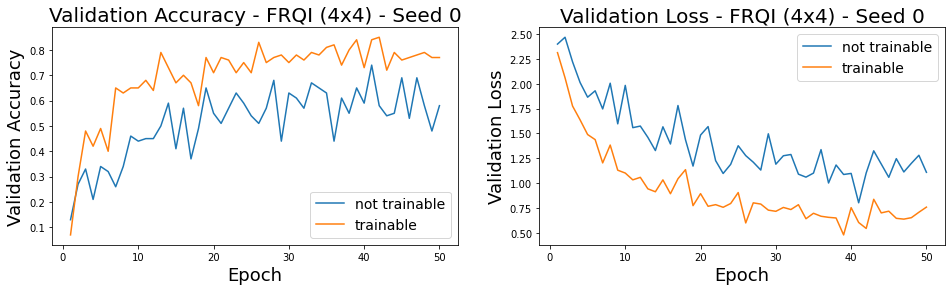

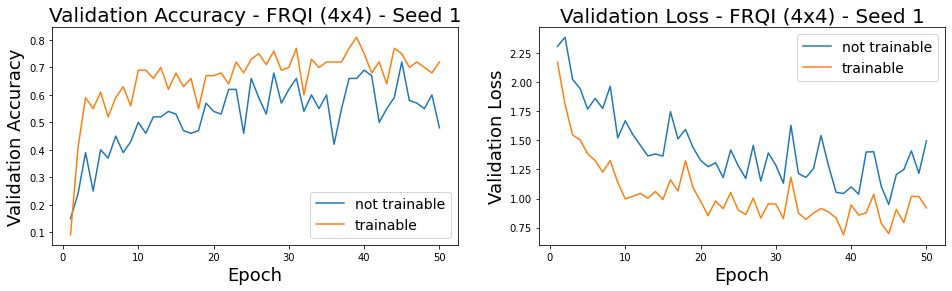

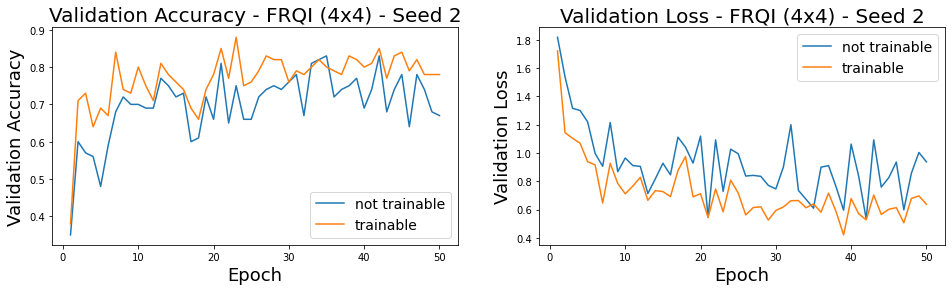

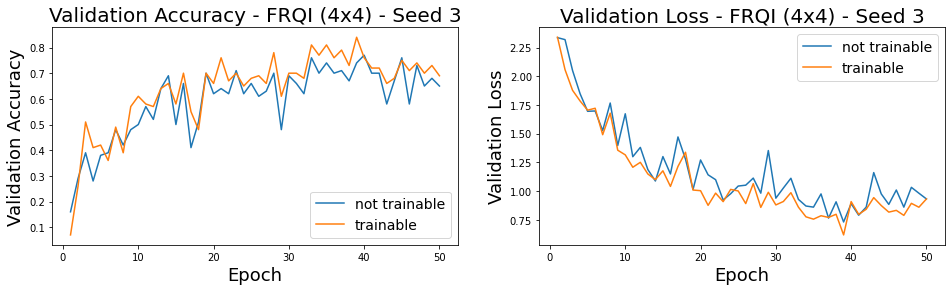

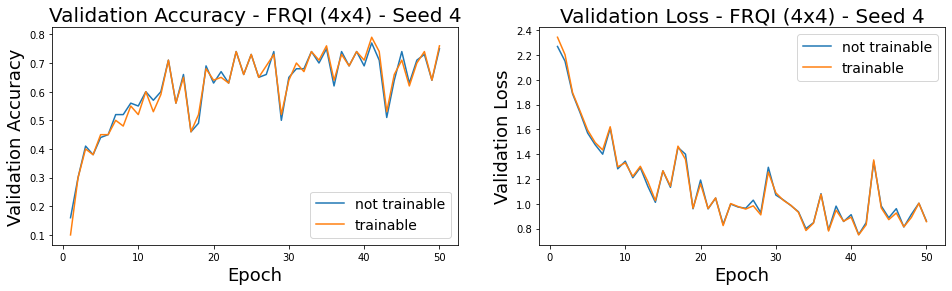

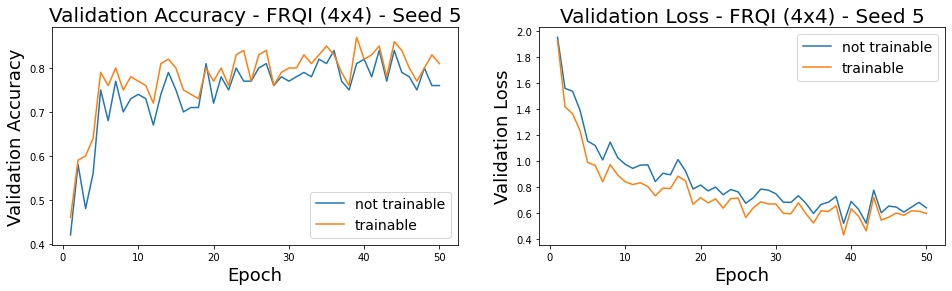

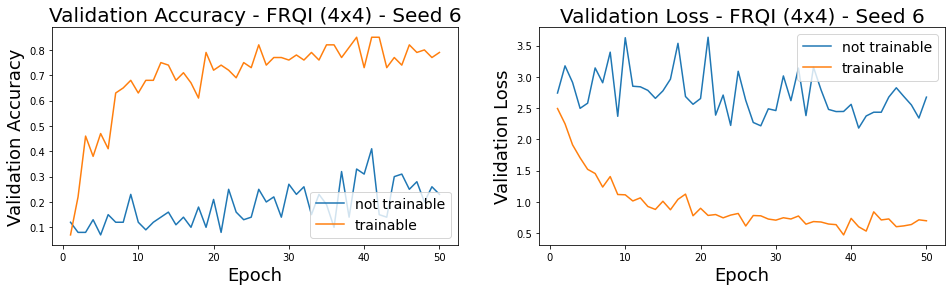

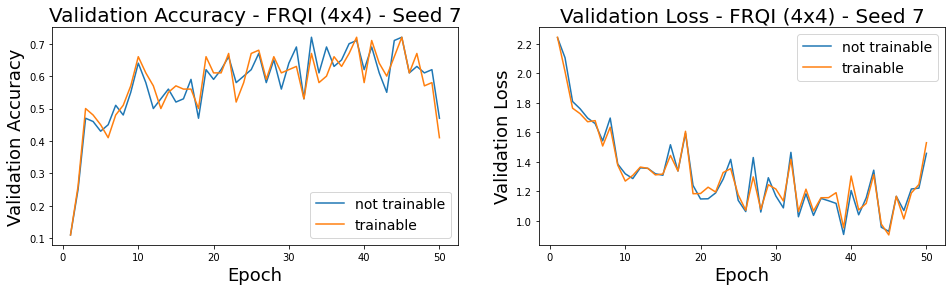

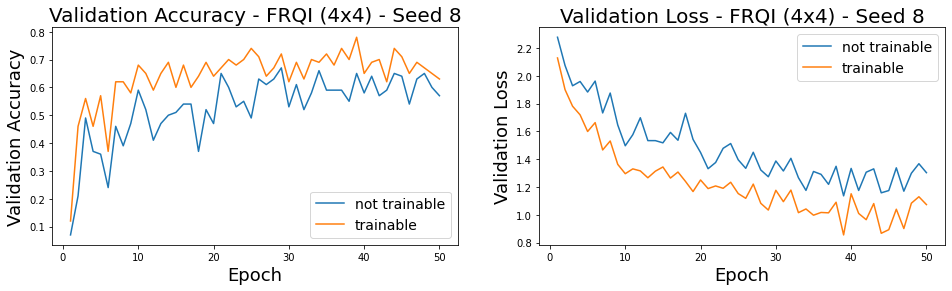

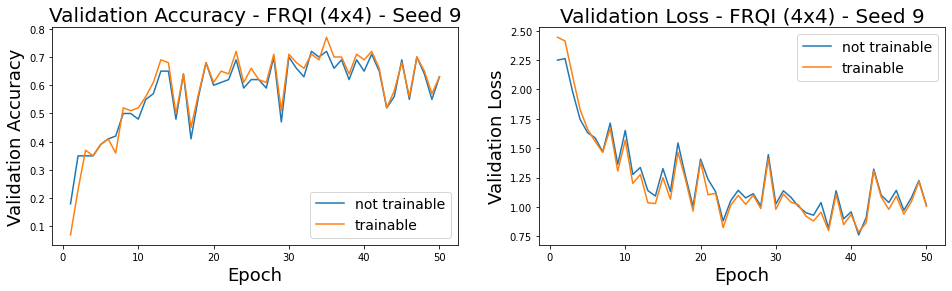

In [39]:
for seed in sorted(all_data.Seed.unique()):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
    
    data = pd.concat([frqi_trainable, frqi_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()
    data = data[data.Seed == seed]
    title = "FRQI ({}) - Seed {}".format(filter_size, seed)

    
    ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

    ax1.set_title("Validation Accuracy - " + title, fontsize=fontsize_title)
    ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
    ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax1.legend(loc="lower right", fontsize=fontsize_legend)


    ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

    ax2.set_title("Validation Loss - " + title, fontsize=fontsize_title)
    ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
    ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax2.legend(loc="upper right", fontsize=fontsize_legend)
    
    
    fig.savefig(plot_path + "FRQI_Seed_{}_trainable_vs_untrainable_val_acc.png".format(seed))
    

### NEQR

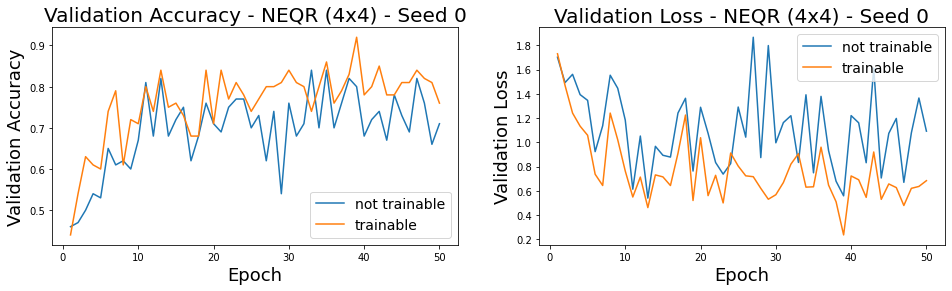

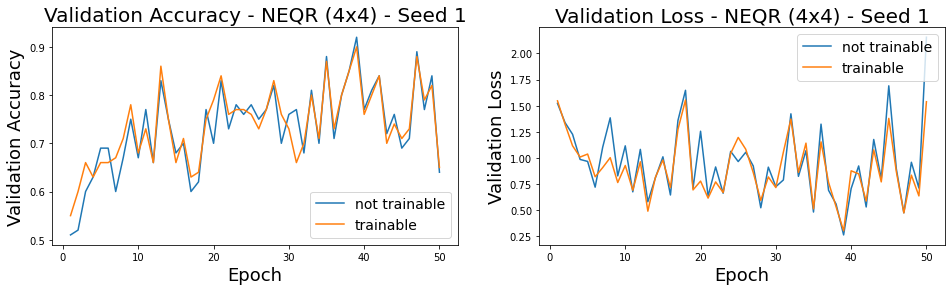

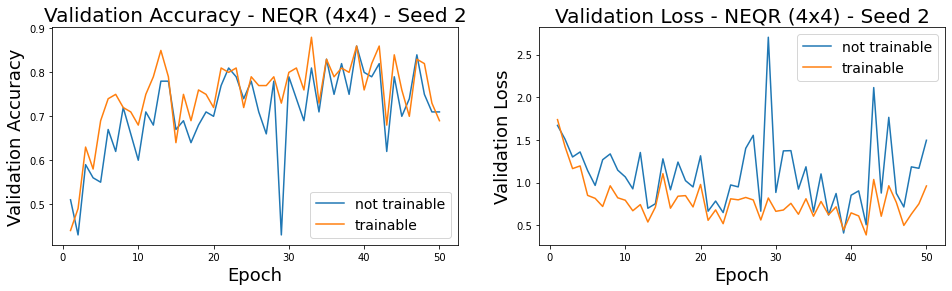

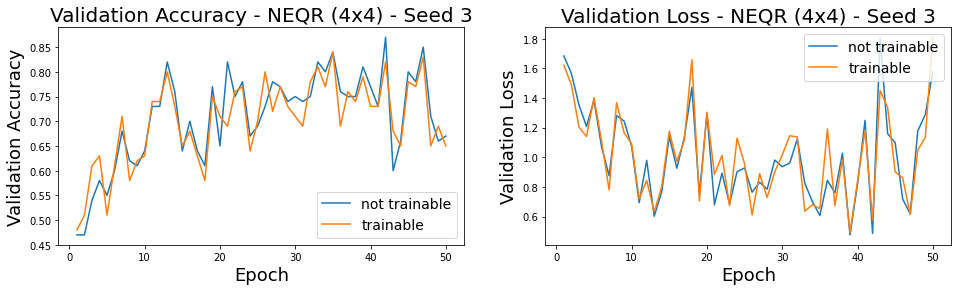

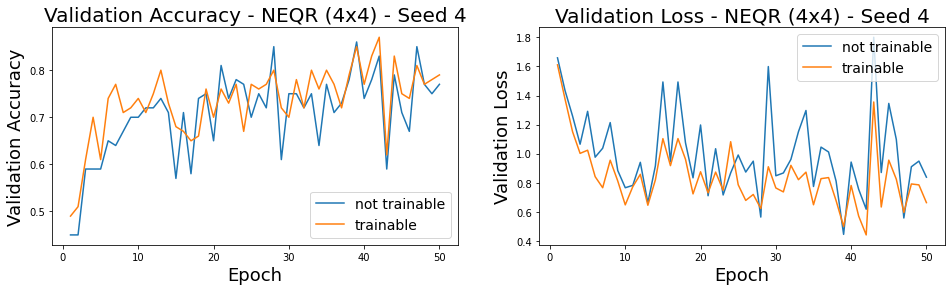

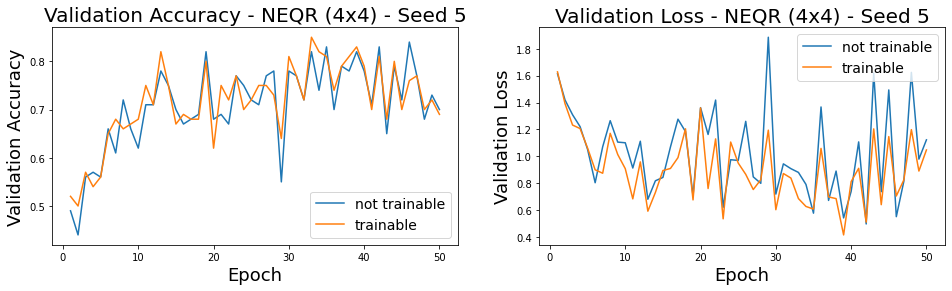

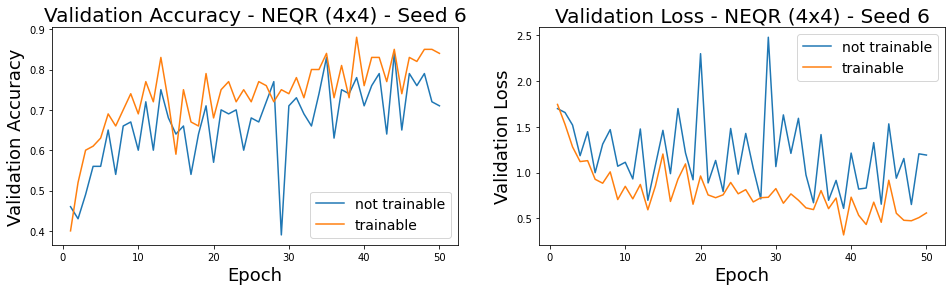

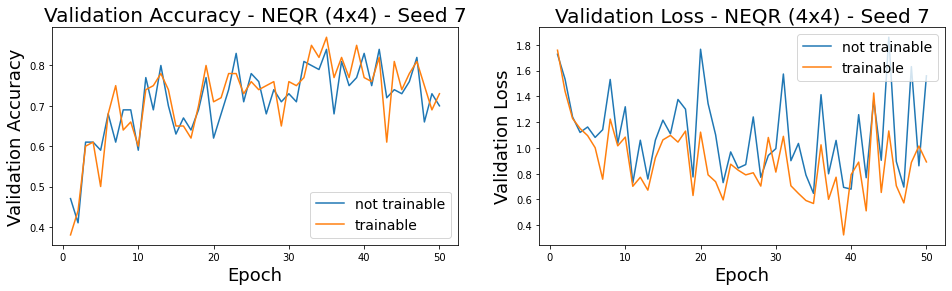

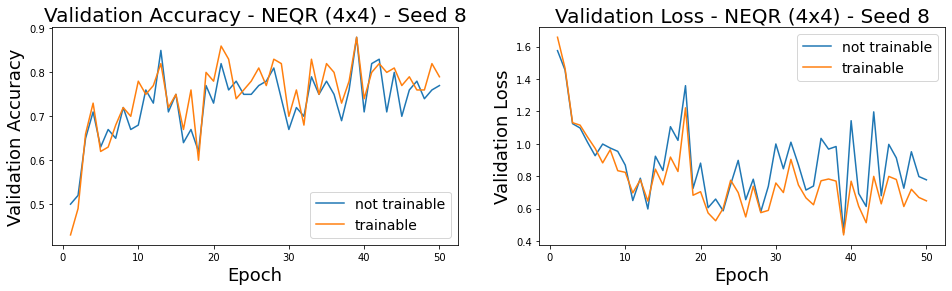

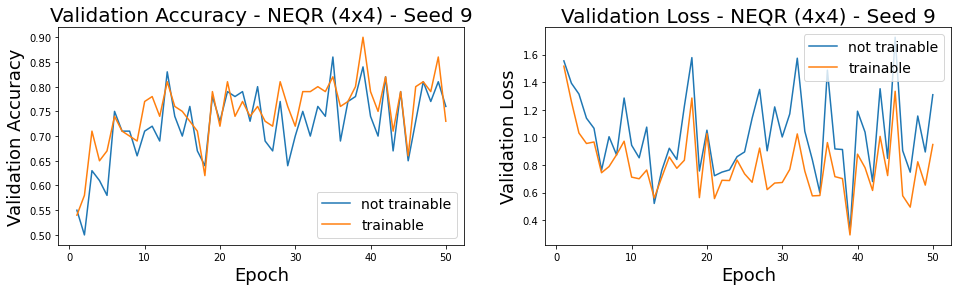

In [40]:
for seed in sorted(all_data.Seed.unique()):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
    
    data = pd.concat([neqr_trainable, neqr_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()
    data = data[data.Seed == seed]
    title = "NEQR ({}) - Seed {}".format(filter_size, seed)

    
    ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

    ax1.set_title("Validation Accuracy - " + title, fontsize=fontsize_title)
    ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
    ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax1.legend(loc="lower right", fontsize=fontsize_legend)


    ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

    ax2.set_title("Validation Loss - " + title, fontsize=fontsize_title)
    ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
    ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax2.legend(loc="upper right", fontsize=fontsize_legend)
    
    
    fig.savefig(plot_path + "NEQR_Seed_{}_trainable_vs_untrainable_val_acc.png".format(seed))

### Threshold Encoder

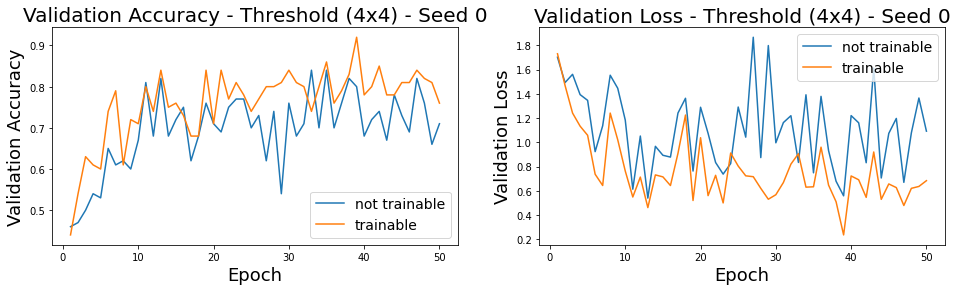

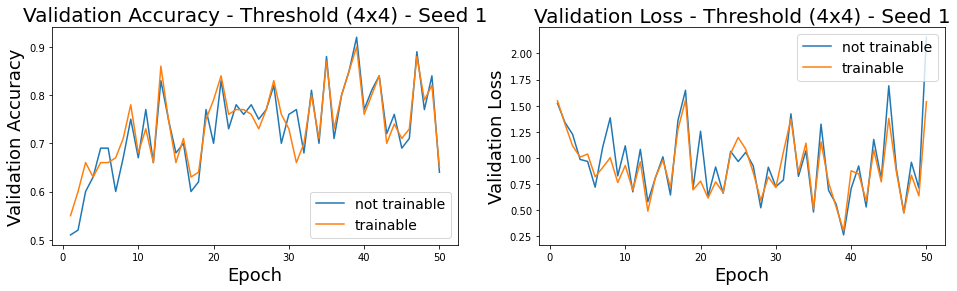

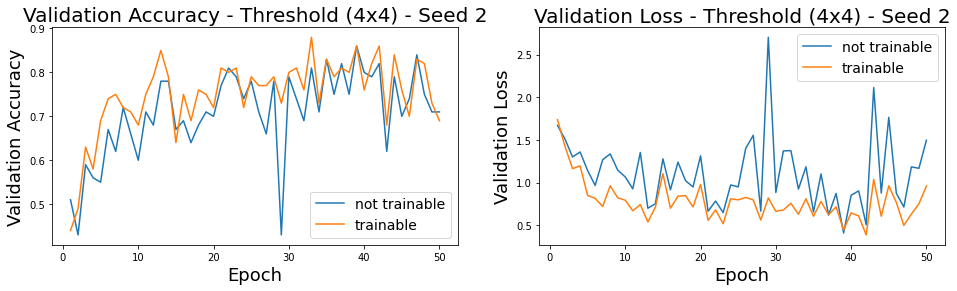

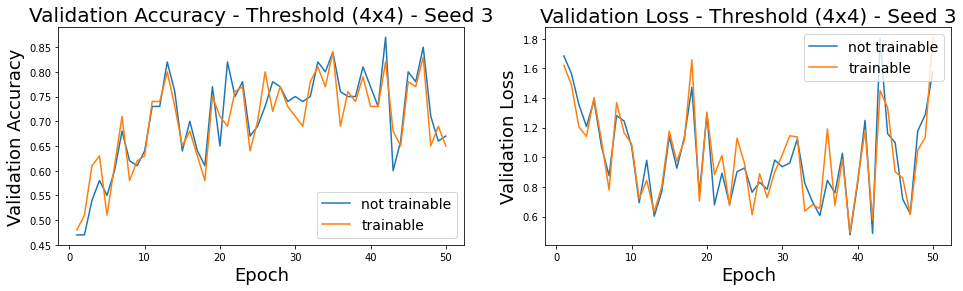

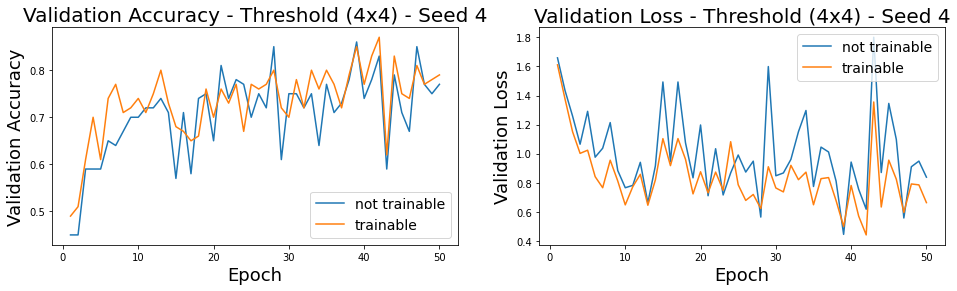

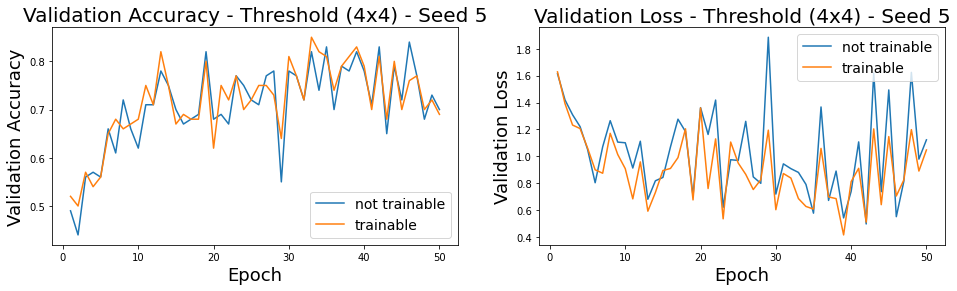

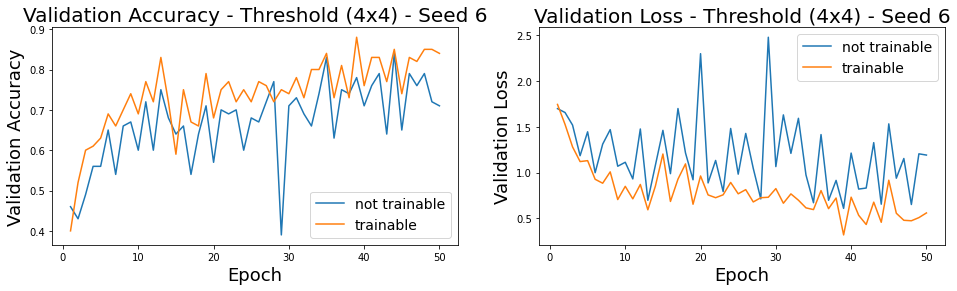

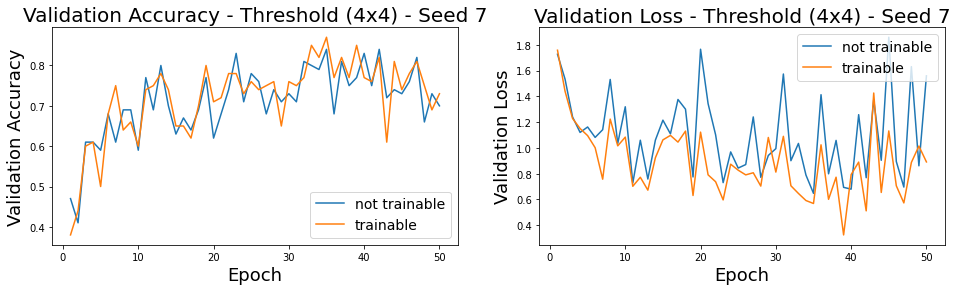

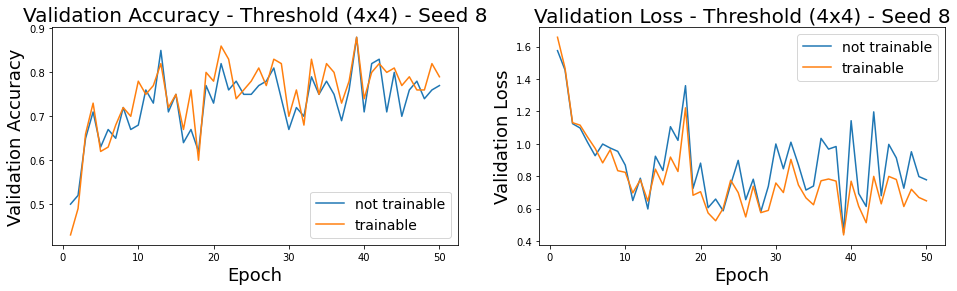

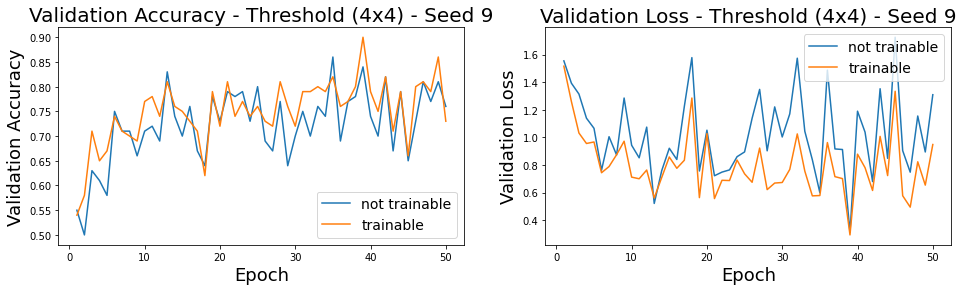

In [41]:
for seed in sorted(all_data.Seed.unique()):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
    
    data = pd.concat([neqr_trainable, neqr_untrainable]).groupby(["QuanvolutionalLayer", "Seed"]).rolling(window=smoothing_window).mean().dropna()
    data = data[data.Seed == seed]
    title = "Threshold ({}) - Seed {}".format(filter_size, seed)

    
    ax1 = sns.lineplot(data=data, x="epoch", y="val_acc", hue="QuanvolutionalLayer", ax=ax1)

    ax1.set_title("Validation Accuracy - " + title, fontsize=fontsize_title)
    ax1.set_ylabel("Validation Accuracy", fontsize=fontsize_axes)
    ax1.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax1.legend(loc="lower right", fontsize=fontsize_legend)


    ax2 = sns.lineplot(data=data, x="epoch", y="val_loss", hue="QuanvolutionalLayer", ax=ax2)

    ax2.set_title("Validation Loss - " + title, fontsize=fontsize_title)
    ax2.set_ylabel("Validation Loss", fontsize=fontsize_axes)
    ax2.set_xlabel("Epoch", fontsize=fontsize_axes)
    ax2.legend(loc="upper right", fontsize=fontsize_legend)
    
    
    fig.savefig(plot_path + "ThresholdEncoder_Seed_{}_trainable_vs_untrainable_val_acc.png".format(seed))
    